In [102]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC
import pandas as pd

In [103]:
X, y = load_iris(return_X_y=True)
df_x = pd.DataFrame(X, columns = ['F1','F2','F3','F4'])
df_y = pd.DataFrame(y, columns = ['True_value'])
print(df_x.shape)
print(type(df_x))
print(df_y)

(150, 4)
<class 'pandas.core.frame.DataFrame'>
     True_value
0             0
1             0
2             0
3             0
4             0
..          ...
145           2
146           2
147           2
148           2
149           2

[150 rows x 1 columns]


In [104]:
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(df_x, df_y['True_value'])
#print(clf.feature_importances_)   

In [105]:
features_score = pd.DataFrame(clf.feature_importances_)
features = pd.DataFrame(df_x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(10,columns="F_Score"))

  Input_Features   F_Score
2             F3  0.424556
3             F4  0.420308
0             F1  0.097335
1             F2  0.057801


In [106]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)
X_new.shape  

(150, 2)

In [107]:
display(X_new)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

# Metodo basato su SVM

In [108]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=2000)
lsvc = lsvc.fit(df_x, df_y['True_value'])
model_2 = SelectFromModel(lsvc, prefit=True)
X_new_2 = model_2.transform(X)
X_new_2.shape

(150, 3)

In [109]:
'''features_score_svm = pd.DataFrame(lsvc.feature_names_in_)
features_svm = pd.DataFrame(df_x.columns)
feature_score_svm = pd.concat([features_svm,features_score_svm],axis=1)
# Assigning column names
features_score_svm.columns = ["Input_Features","F_Score"]
print(feature_score_svm.nlargest(10,columns="F_Score"))'''

'features_score_svm = pd.DataFrame(lsvc.feature_names_in_)\nfeatures_svm = pd.DataFrame(df_x.columns)\nfeature_score_svm = pd.concat([features_svm,features_score_svm],axis=1)\n# Assigning column names\nfeatures_score_svm.columns = ["Input_Features","F_Score"]\nprint(feature_score_svm.nlargest(10,columns="F_Score"))'

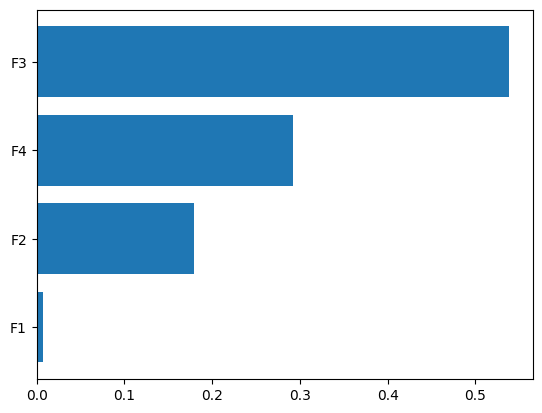

In [110]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = df_x.head(0)
svm = svm.SVC(kernel='linear',max_iter=500)
svm.fit(df_x, df_y['True_value'])

lsvc = LinearSVC(C=0.01, penalty="l1", dual=False,max_iter=2000)
lsvc = lsvc.fit(df_x, df_y['True_value'])

f_importances(abs(svm.coef_[1]), features_names)

In [114]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR

model = LogisticRegression(solver='lbfgs')
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(df_x, df_y)

c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [116]:
print(selector.ranking_)

[1 1 1 1]


In [123]:
from sklearn.linear_model import LogisticRegression

selector = SelectFromModel(estimator=LogisticRegression()).fit(df_x, df_y)
selector.estimator_.coef_

c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\pc\anaconda3\envs\tensor\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[-0.41803783,  0.96627493, -2.52149409, -1.08399852],
       [ 0.53096505, -0.31441687, -0.19911417, -0.94921552],
       [-0.11292721, -0.65185806,  2.72060826,  2.03321404]])

In [134]:
from sklearn.tree import DecisionTreeClassifier

# define the method
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)
# fit the model
rfe.fit(df_x, df_y)

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=3)

In [135]:

# evaluate RFE for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# create pipeline
rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.886 (0.034)


In [143]:
# report which features were selected by RFE
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define RFE
rfe = RFE(estimator=SVR(), n_features_to_select=5)
# fit RFE
rfe.fit(df_x, df_y)
# summarize all features
for i in range(4):
 print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

ValueError: Number of informative, redundant and repeated features must sum to less than the number of total features